In [786]:
import warnings
warnings.filterwarnings("ignore")

from fbprophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from itertools import product
from sklearn.metrics import r2_score

import pandas as pd
pd.options.display.max_columns = 999
import numpy as np

from sklearn.metrics import mean_squared_error
#RMSE = mean_squared_error(y, y_pred)**0.5

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
%matplotlib inline
import matplotlib.pyplot as plt

In [787]:
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [788]:
def tsplot(df, lags=None, figsize=(12, 7), style='bmh'):
   
    if not isinstance(df, pd.Series):
        y = df['price']
        y.index = df.Date
    else:
         y = df
            
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

## Подготовка данных

18320

In [895]:
df_price = pd.read_csv('data/player_price.csv')
df_stats = pd.read_csv('data/player_stats.csv')

In [896]:
df_price=df_price[df_price.player_id<=18320]
player_id=df_price.groupby(['player_id'])['xbox_price'].count()

In [160]:
for i in player_id.index:
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


4143
4159
4169
4173
4177
4179
4181
4210
4211
4216
4222
4227
4230
4233
4240
4260
4280
4284
4290
4291
4292
4304
4324
4326
4329
4346
4348
4353
4355
4356
4359
4362
4364
4365
4366
4372
4375
4380
4383
4387
4394
4398
4399
4402
4410
4416
4437
4444
4459
4468
4491
4516
4538
4540
4547
4557
4590
4599
4604
4608
4623
4625
4631
4632
4635
4637
4638
4640
4645
4649
4651
4662
4674
4681
4703
4794
4797
4799
4804
4850
4858
4866
4873
4875
4894
4898
4905
4909
4925
4930
4933
4946
4956
4970
4972
5070
5072
5073
5079
5095
5099
5152
5154
5168
5169
5173
5213
5218
5286
5369
5412
5431
5439
5511
5525
5526
5549
5562
5563
5565
5573
5613
5643
5657
5672
5681
5695
5697
5711
5712
5726
5733
5747
5749
5765
5799
5819
5852
5860
5863
5883
5890
5893
5898
5899
5910
5913
5916
5917
5919
5927
5931
5936
5941
5942
5947
5950
5964
5975
5984
5985
5988
6003
6008
6036
6060
6085
6091
6100
6134
6192
6250
6299
6309
6352
6371
6373
6444
6451
6519
6528
6533
6550
6560
6562
6586
6591
6602
6604
6621
6624
6679
6687
6707
6713
6725
6727
6739
6751
6799


17636
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17760
17762
17763
17764
17765
17766
17767
17770
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17791
17792
17794
17798
17800
17801
17804
17805
17809
17816
17817
17819
17820
17822
17823
17824
17826
17827
17828
17829
17830
17835
17840
17842
17847
17851
1785

In [331]:
df_price=df_price[df_price.player_id==123]
df_price.shape

(270, 5)

In [709]:
df_price['Date'] = pd.to_datetime(df_price['timestamp'], unit='ms')
df_price.drop(['timestamp'], axis=1, inplace=True)
df_price.drop(['ps_price'],axis = 1, inplace=True)
df_price.rename(columns={'xbox_price':'price'}, inplace = True)

In [710]:
#df_merge=pd.merge(df_price,df_stats,on='player_id', how='inner')
df_merge=df_stats[["player_id"]].merge(df_price, on=['player_id'], how='inner')
df_merge.shape

(955314, 4)

In [422]:
#df_merge['id'] = df_merge['player_id'].astype(str) + "_" +  df_merge['Date'].astype(str)
df_merge.head()

,player_id,price,player_name,Date
0,123,34500,Santi Cazorla,2016-09-23
1,123,0,Santi Cazorla,2016-09-24
2,123,30000,Santi Cazorla,2016-09-25
3,123,0,Santi Cazorla,2016-09-26
4,123,0,Santi Cazorla,2016-09-27


In [359]:
#df=df_merge[['Date','price']]
#df=df.groupby('Date')[['price']].mean()
#df=df.reset_index()
#df.columns = ['ds', 'y']
#df=df.set_index('ds')
#df=df.replace(0,int(df.mean()))

#df.head()

In [970]:
player1_id = (df_merge.player_id ==  63)
player1_ts = df_merge[player1_id].price
player1_ts.index = df_merge[player1_id].Date
player1_ts.head()

Date
2016-09-23    1700000
2016-09-24          0
2016-09-25          0
2016-09-26          0
2016-09-27     840000
Name: price, dtype: int64

In [971]:
(player1_ts.index.min(), player1_ts.index.max())

(Timestamp('2016-09-23 00:00:00'), Timestamp('2017-06-19 00:00:00'))

In [972]:
print(len(player1_ts), len(player1_ts[player1_ts==0]))
player1_ts = player1_ts.replace(to_replace=0, method='bfill')
print(len(player1_ts), len(player1_ts[player1_ts==0]))

270 4
270 0


In [973]:
player1_ts.head()

Date
2016-09-23    1700000
2016-09-24     840000
2016-09-25     840000
2016-09-26     840000
2016-09-27     840000
Name: price, dtype: int64

In [974]:
player1_ts.tail()

Date
2017-06-15    518714
2017-06-16    521905
2017-06-17    507577
2017-06-18    486250
2017-06-19    483690
Name: price, dtype: int64

### Исходный график временного рядя с ценами

Критерий Дики-Фуллера: p=0.721798


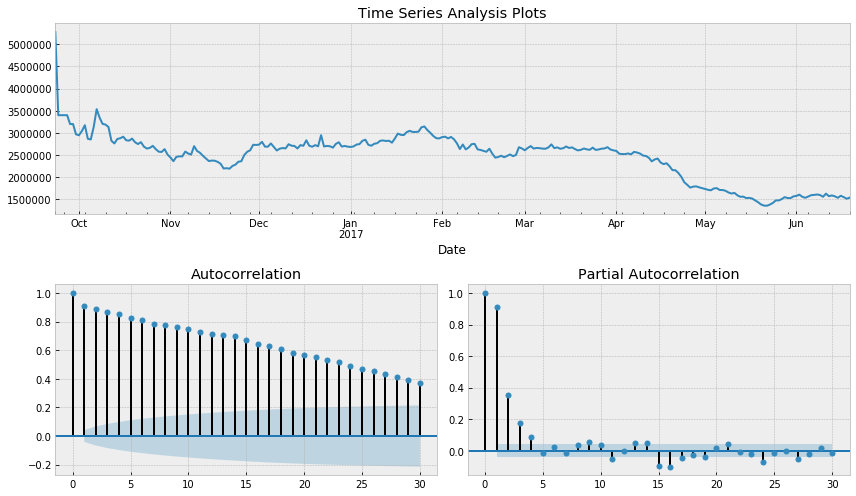

In [901]:
tsplot(player1_ts,lags = 30)

### STL-декомпозиция 

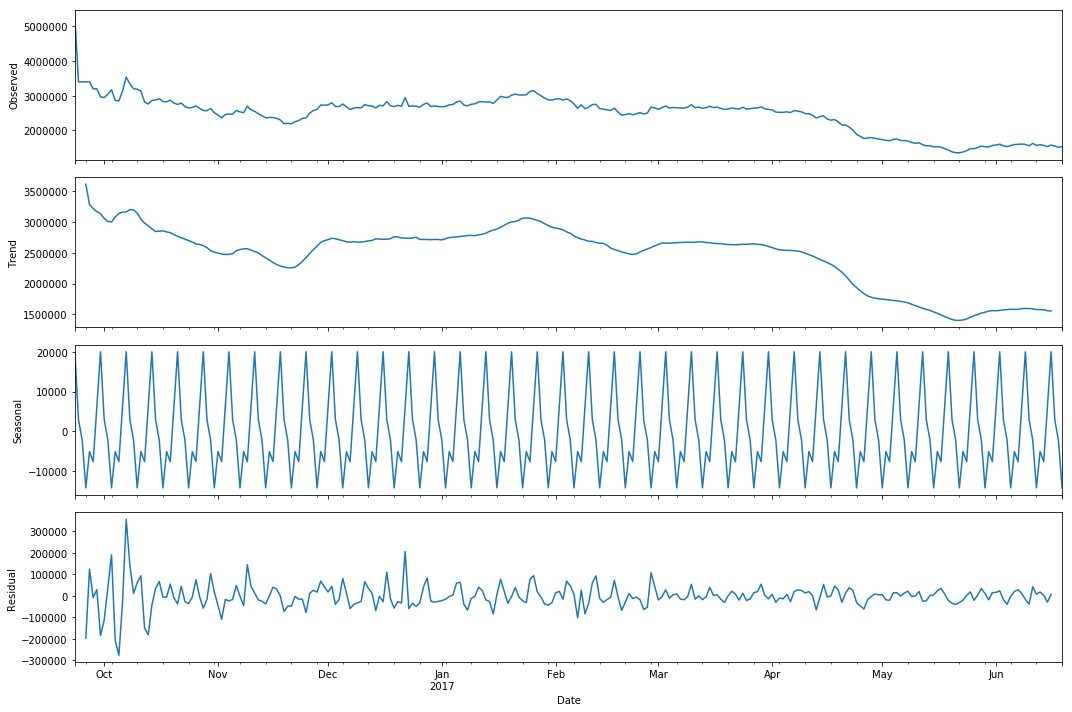

In [903]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(player1_ts).plot()
pylab.show()

### Проверка ряда на стационарность

In [904]:
#print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['y'])[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(player1_ts)[1])

Критерий Дики-Фуллера: p=0.721798


### Стабилизация дисперсии

In [905]:
modified_ts, lmbda = stats.boxcox(player1_ts)
lmbda

1.2183654114311884

In [819]:
lmbda = 0
modified_ts = stats.boxcox(player1_ts,lmbda = 0)

Критерий Дики-Фуллера: p=0.658320
Ряд после преобразования Бокса-Кокса c пареметром lmbda: 1.218365


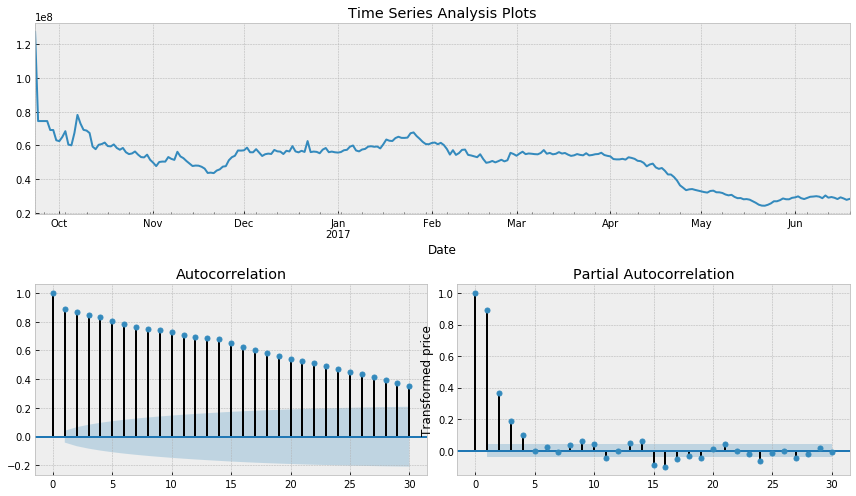

In [906]:
player1_ts_box=pd.Series(modified_ts)
player1_ts_box.index = player1_ts.index[:]

tsplot(player1_ts_box,lags = 30)
plt.ylabel(u'Transformed price')
print("Ряд после преобразования Бокса-Кокса c пареметром lmbda: %1f" % lmbda)
#plt.show()

### Избавляемся от тренда и сезонности

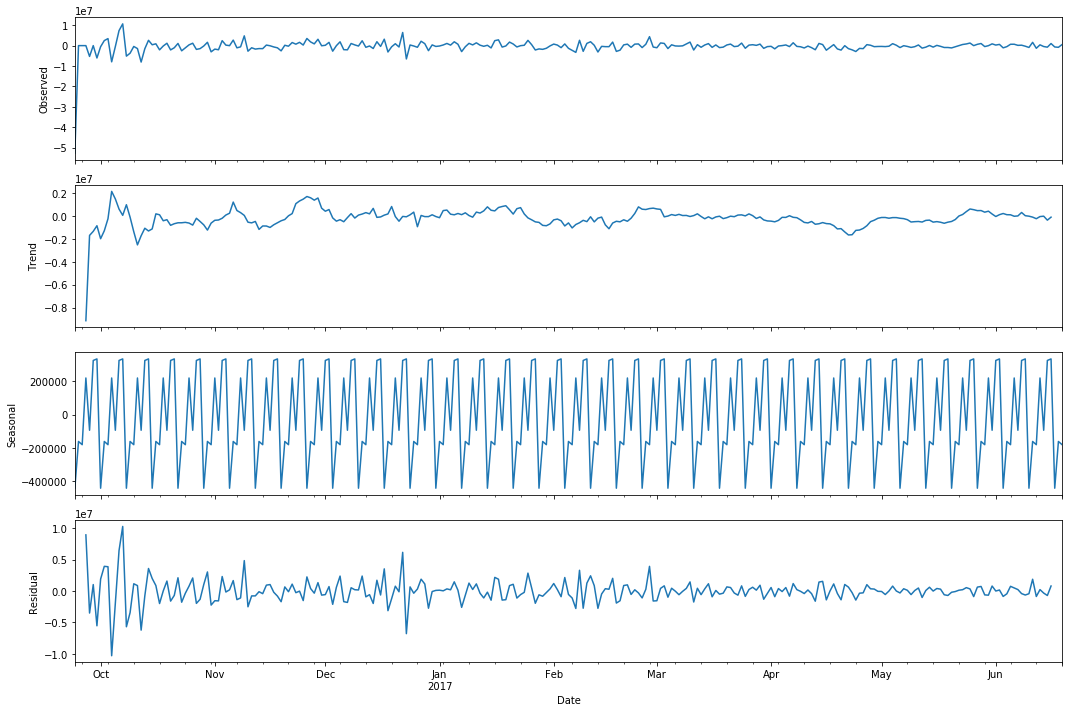

In [907]:
player1_ts_diff = player1_ts_box - player1_ts_box.shift(1)
player1_ts_diff = player1_ts_diff[1:]
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(player1_ts_diff).plot()
pylab.show()

Критерий Дики-Фуллера: p=0.000000


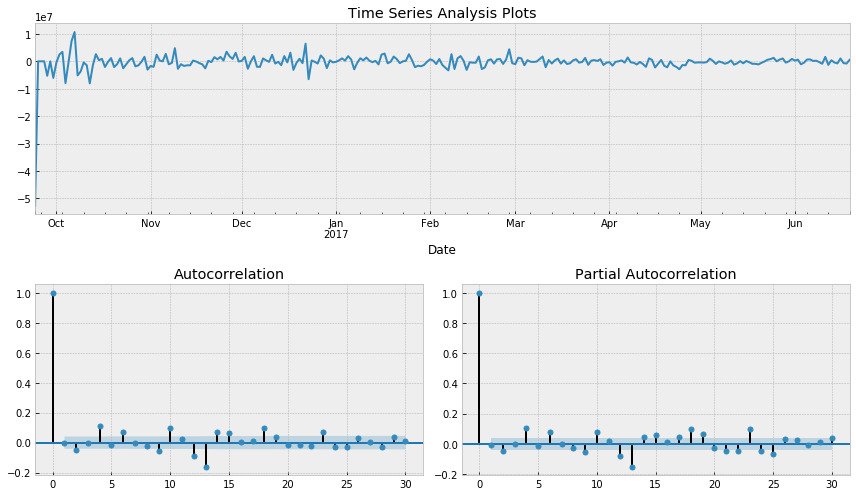

In [908]:
tsplot(player1_ts_diff,30)

In [909]:
ps = range(0, 12)
d=1
qs = range(0, 5)
Ps = range(0, 1)
D=0
Qs = range(0, 1)


from itertools import product

parameters = product(ps, qs)#, Ps, Qs)
parameters_list = list(parameters)
print("Количество параметров: {}".format(len(parameters_list)))

Количество параметров: 60


### подбор параметров

In [910]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        #model=sm.tsa.statespace.SARIMAX(player1_ts_box, order=(param[0], d, param[1]), 
        #                                seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        model=sm.tsa.statespace.SARIMAX(player1_ts_box, order=(param[0], d, param[1])).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

wrong parameters: (0, 0)
wrong parameters: (3, 3)
wrong parameters: (3, 4)
wrong parameters: (4, 2)
wrong parameters: (5, 2)
wrong parameters: (8, 4)
wrong parameters: (9, 4)


LinAlgError: Singular matrix

In [861]:
best_param

(2, 3)

In [862]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

   parameters         aic
11     (2, 3)  442.563802
18     (4, 1)  444.508923
16     (3, 3)  444.564355
22     (5, 2)  444.920389
20     (5, 0)  445.473418


In [863]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -215.282
Date:                Sun, 02 Jul 2017   AIC                            442.564
Time:                        15:28:37   BIC                            464.154
Sample:                    09-23-2016   HQIC                           451.234
                         - 06-19-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3546      0.071     -5.000      0.000      -0.494      -0.216
ar.L2         -0.8209      0.070    -11.733      0.000      -0.958      -0.684
ma.L1          0.1082      0.092      1.175      0.2

In [864]:
print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[1:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[1:])[1])

Критерий Стьюдента: p=0.030563
Критерий Дики-Фуллера: p=0.000000


## остатки

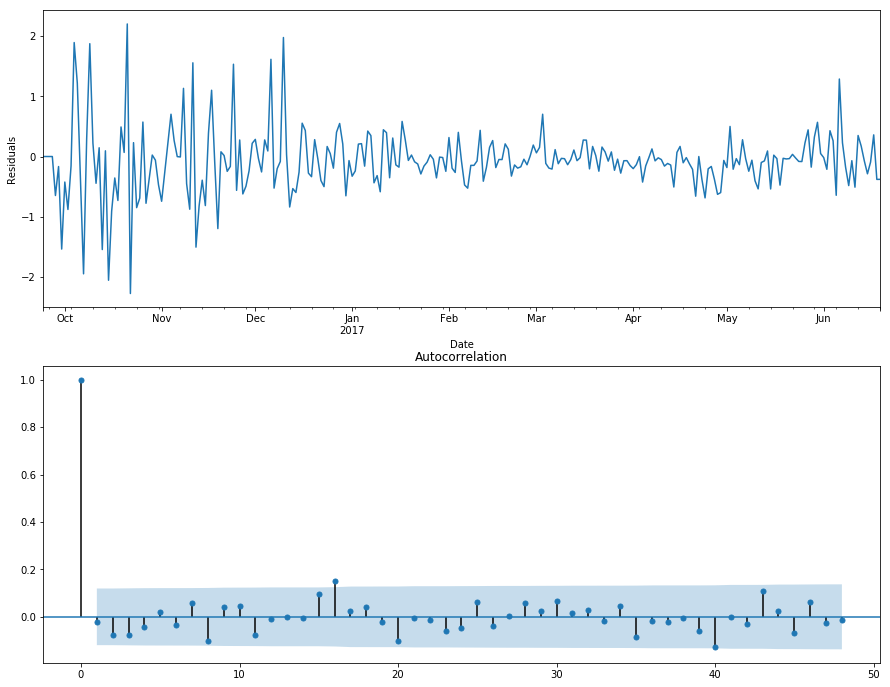

In [865]:
plt.figure(figsize(15,12))
plt.subplot(211)
best_model.resid[1:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[1:].values.squeeze(), lags=48, ax=ax)
plt.show()

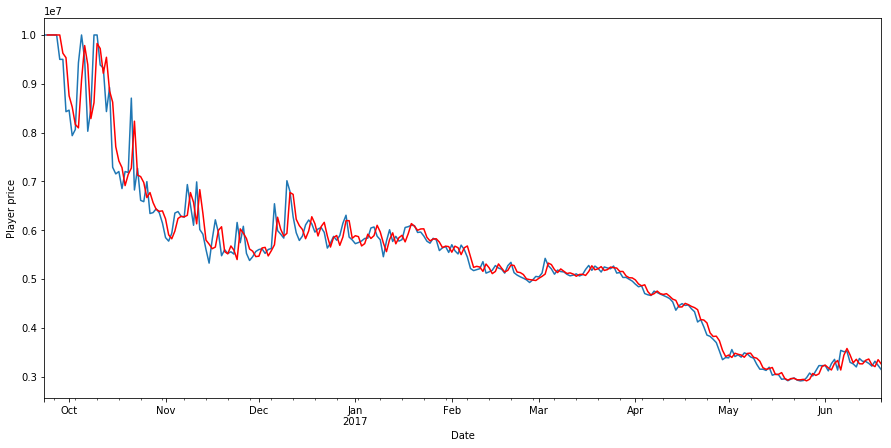

In [866]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

plt.figure(figsize(15,7))
player1_ts.plot()
#best_model.fittedvalues[1:].plot(color='r')
invboxcox(best_model.fittedvalues[1:], lmbda).plot(color = 'r')
plt.ylabel('Player price')
pylab.show()

** коэффициент детерминации **

In [886]:
r2_score(invboxcox(best_model.fittedvalues[1:],lmbda), player1_ts[1:])

0.9615400123397746

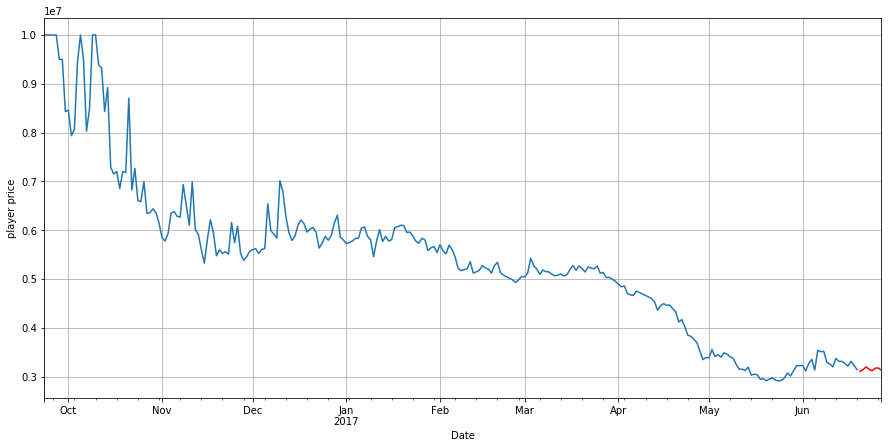

In [887]:
plt.figure(figsize(15,7))
player1_ts.plot()
predict=best_model.predict(start=270, end=277)
#predict=predict*100
invboxcox(best_model.predict(start=270, end=277),lmbda).plot(color='r')
plt.ylabel('player price')
plt.ylabel('player price')
plt.grid()
pylab.show()

In [888]:
predict

2017-06-20    60.596404
2017-06-21    60.715357
2017-06-22    60.908532
2017-06-23    60.742374
2017-06-24    60.642717
2017-06-25    60.814462
2017-06-26    60.835366
2017-06-27    60.686963
Freq: D, dtype: float64

In [611]:
plid=2

In [612]:
pp=pd.DataFrame(columns=['id','price'])

In [617]:
pp['id']=str(plid)+'_'+predict.index.astype(str)

In [618]:
pp.price=predict.values
pp.price=pp.price.astype(int)
pp.to_csv('prediction.csv',sep=',',header=True,index=False)

---------------

In [892]:
df_price = pd.read_csv('data/player_price.csv')
df_stats = pd.read_csv('data/player_stats.csv')
sample_subm = pd.read_csv('data/kaggle_sample_submission.csv')

sample_subm["player_id"] = sample_subm["id"].apply(lambda x: int(x.split("_")[0]))
sample_subm["Date"] = sample_subm["id"].apply(lambda x: np.datetime64(x.split("_")[1]))

#player_id=df_price.groupby(['player_id'])['xbox_price'].count()
player_id=sample_subm.groupby(['player_id'])['price'].count()

#df_price=df_price[df_price.player_id<=18320]
df_price['Date'] = pd.to_datetime(df_price['timestamp'], unit='ms')
df_price.drop(['timestamp'], axis=1, inplace=True)
df_price.drop(['ps_price'],axis = 1, inplace=True)
df_price.rename(columns={'xbox_price':'price'}, inplace = True)

df_merge=df_stats[["player_id"]].merge(df_price, on=['player_id'], how='inner')

df_merge.shape

(955314, 4)

In [ ]:
kaggle=pd.read_csv('data/kaggle_sample_submission.csv')
kaggle['player_id'] = kaggle['id'].apply(lambda x: int(x.split("_")[0]))

In [890]:
#df_price=df_price_all[df_price_all.player_id==i]

In [956]:
len(player_id.index)

4166

In [1005]:
%%time
k=1
for i in player_id.index[261:len(player_id.index)]:#player_id.index:#range(1,6):
    #df_price=df_price_all[df_price_all.player_id==i]
    print('==================================')
    print('id={}'.format(i))
        
    player1_id = (df_merge.player_id==i)
    player1_ts = df_merge[player1_id].price
    player1_ts.index = df_merge[player1_id].Date
    
    print(len(player1_ts), len(player1_ts[player1_ts==0]))
    player1_ts = player1_ts.replace(to_replace=0, method='bfill')
    print(len(player1_ts), len(player1_ts[player1_ts==0]))
    print(player1_ts.shape)
    
    print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(player1_ts)[1])
    
    modified_ts, lmbda = stats.boxcox(player1_ts)
    if lmbda<=0:
        lmbda = 0
        modified_ts = stats.boxcox(player1_ts,lmbda = 0)
    #modified_ts, lmbda=stats.boxcox([1 if x == 0 else x for x in player1_ts])
    
    player1_ts_box=pd.Series(modified_ts)
    player1_ts_box.index = player1_ts.index[:]
    
    player1_ts_diff = player1_ts_box - player1_ts_box.shift(1)
    player1_ts_diff = player1_ts_diff[1:]
    print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(player1_ts_diff)[1])
    
    
    ps = range(0, 12)
    d=1
    qs = range(0, 5)
    Ps = range(0, 1)
    D=0
    Qs = range(0, 1)
    
    from itertools import product
    parameters = product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    print("Количество параметров: {}".format(len(parameters_list)))
    
    #----------------
    %%time
    results = []
    best_aic = float("inf")
    warnings.filterwarnings('ignore')

    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            #model=sm.tsa.statespace.SARIMAX(player1_ts_box, order=(param[0], d, param[1]), 
            #                                seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
            model=sm.tsa.statespace.SARIMAX(player1_ts_box, order=(param[0], d, param[1])).fit(disp=-1)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters:', param)
            continue
        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    warnings.filterwarnings('default')
    #---------------
    
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    print(result_table.sort_values(by = 'aic', ascending=True).head())
    
    print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[1:], 0)[1])
    print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[1:])[1])
    print('r2 score: {}'.format(r2_score(invboxcox(best_model.fittedvalues[1:],lmbda), player1_ts[1:])))
    
    predict=best_model.predict(start=270, end=277)
    #predict=predict*1000
    print(predict)
    
    pp=pd.DataFrame(columns=['id','price'])
    pp['id']=str(i)+'_'+predict.index.astype(str)
    pp.price=predict.values
    pp.price=pp.price.astype(int)
    
    if k==0:
        pp.to_csv('prediction.csv',sep=',',header=True,index=False)
        k=1
    else:
        with open('prediction.csv', 'a') as f:
            pp.to_csv(f, header=False,index=False,sep=',')
            #pp.to_csv.append('prediction.csv',sep=',',index=False)

id=256
270 13
270 0
(270,)
Критерий Дики-Фуллера: p=0.035462
Критерий Дики-Фуллера: p=0.000000
Количество параметров: 60
Wall time: 0 ns
wrong parameters: (0, 0, 0, 0)
wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 3, 0, 0)
wrong parameters: (3, 2, 0, 0)
wrong parameters: (3, 3, 0, 0)
wrong parameters: (4, 2, 0, 0)
wrong parameters: (4, 3, 0, 0)
wrong parameters: (5, 2, 0, 0)
wrong parameters: (5, 3, 0, 0)
wrong parameters: (5, 4, 0, 0)
wrong parameters: (6, 3, 0, 0)
wrong parameters: (6, 4, 0, 0)
wrong parameters: (8, 4, 0, 0)
wrong parameters: (9, 4, 0, 0)
wrong parameters: (10, 4, 0, 0)
wrong parameters: (11, 4, 0, 0)
      parameters         aic
7   (1, 3, 0, 0) -133.314926
13  (3, 1, 0, 0) -132.539105
6   (1, 2, 0, 0) -132.321480
10  (2, 2, 0, 0) -132.204317
8   (1, 4, 0, 0) -131.590325
Критерий Стьюдента: p=0.363743
Критерий Дики-Фуллера: p=0.000000
r2 score: 0.9188519645480729
2017-06-20    7.999185
2017-06-21    8.033629
2017-06-22    8.069171
2017-06-23    8.095783
2017-

LinAlgError: Singular matrix

In [1006]:
player1_id = (df_merge.player_id ==  261)
player1_ts = df_merge[player1_id].price
player1_ts.index = df_merge[player1_id].Date

print(len(player1_ts), len(player1_ts[player1_ts==0]))
player1_ts = player1_ts.replace(to_replace=0, method='bfill')
print(len(player1_ts), len(player1_ts[player1_ts==0]))

player1_ts.tail()

270 16
270 0


Date
2017-06-15    4150
2017-06-16    3260
2017-06-17    3060
2017-06-18    3150
2017-06-19    3257
Name: price, dtype: int64

read id from kaggle